# Project: USA Real Estate Analysis

**Problem Statement**:

The goal of this project is to develop a predictive model for real estate prices in the US. Specifically, it aims to:

1. Identify key factors that influence property prices.
2. Build and evaluate a machine learning model to predict property prices based on these factors.
3. Provide actionable insights for potential buyers, sellers, and real estate professionals.

## 1 Data Preprocessing


In [5]:
import pandas as pd

pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)

In [66]:
import warnings

warnings.filterwarnings("ignore")

In [6]:
# load df & inspect first few rows to ensure data integrity and structure

#df = pd.read_csv(file_path_gc) # google colab
df = pd.read_csv(file_path_jn) # jupyter notebook
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [7]:
df.shape

(2226382, 12)

In [8]:
print(df['state'].unique())

['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia' 'Wyoming' 'Maine' 'Georgia'
 'Pennsylvania' 'West Virginia' 'Delaware' 'Louisiana' 'Ohio' 'California'
 'Colorado' 'Maryland' 'Missouri' 'District of Columbia' 'Wisconsin'
 'North Carolina' 'Kentucky' 'Michigan' 'Mississippi' 'Florida' 'Alabama'
 'New Brunswick' nan 'Texas' 'Arkansas' 'Idaho' 'Indiana' 'Illinois'
 'New Mexico' 'Iowa' 'Minnesota' 'South Dakota' 'Nebraska' 'North Dakota'
 'Montana' 'Oklahoma' 'Kansas' 'Oregon' 'Utah' 'Nevada' 'Washington'
 'Arizona' 'Hawaii' 'Guam' 'Alaska']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
brokered_by,2221849.0,5.293989e+04,3.064275e+04,0.0,23861.00,52884.00,79183.00,1.101420e+05
price,2224841.0,5.241955e+05,2.138893e+06,0.0,165000.00,325000.00,550000.00,2.147484e+09
bed,1745065.0,3.275841e+00,1.567274e+00,1.0,3.00,3.00,4.00,4.730000e+02
bath,1714611.0,2.496440e+00,1.652573e+00,1.0,2.00,2.00,3.00,8.300000e+02
acre_lot,1900793.0,1.522303e+01,7.628238e+02,0.0,0.15,0.26,0.98,1.000000e+05
street,2215516.0,1.012325e+06,5.837635e+05,0.0,506312.75,1012765.50,1521173.25,2.001357e+06
zip_code,2226083.0,5.218668e+04,2.895408e+04,0.0,29617.00,48382.00,78070.00,9.999900e+04
house_size,1657898.0,2.714471e+03,8.081635e+05,4.0,1300.00,1760.00,2413.00,1.040400e+09


In [11]:
df.isna().sum().sort_values(ascending = False)

prev_sold_date    734297
house_size        568484
bath              511771
bed               481317
acre_lot          325589
street             10866
brokered_by         4533
price               1541
city                1407
zip_code             299
state                  8
status                 0
dtype: int64

In [67]:
# mode imputation to handle missing values

df['house_size'].fillna(df['house_size'].mode()[0], inplace = True)
df['bath'].fillna(df['bath'].mode()[0], inplace = True)
df['bed'].fillna(df['bed'].mode()[0], inplace = True)
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace = True)
df['price'].fillna(df['price'].mode()[0], inplace = True)

In [13]:
columns_to_drop = ['prev_sold_date', 'brokered_by']
df = df.drop(columns_to_drop, axis = 1)
df = df.dropna(subset = ['street', 'city', 'zip_code', 'state'])

In [14]:
# verify that there are no missing values

df.isnull().sum()

status        0
price         0
bed           0
bath          0
acre_lot      0
street        0
city          0
state         0
zip_code      0
house_size    0
dtype: int64

In [15]:
df.head()

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,1200.0


## 2 Exploratory Data Analysis (EDA)

In [16]:
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

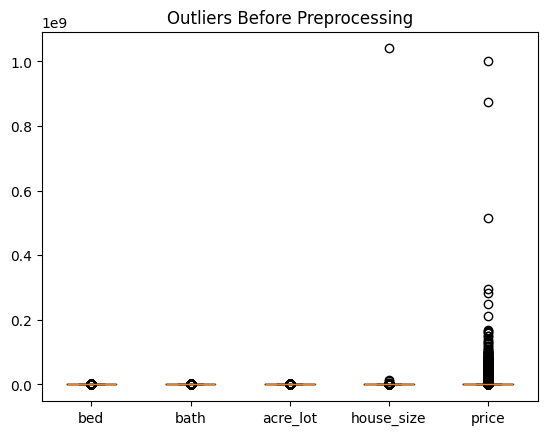

Total # of Rows with Outliers: 2214025


In [17]:
# outliers before preprocessing

column = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
plt.boxplot(df[column])
plt.xticks([1, 2, 3, 4, 5], column)
plt.title('Outliers Before Preprocessing')
plt.show()
print(f'Total # of Rows with Outliers: {df.shape[0]}')

In [18]:
# replace outliers with the median using the IQR method

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).any(axis = 1)]

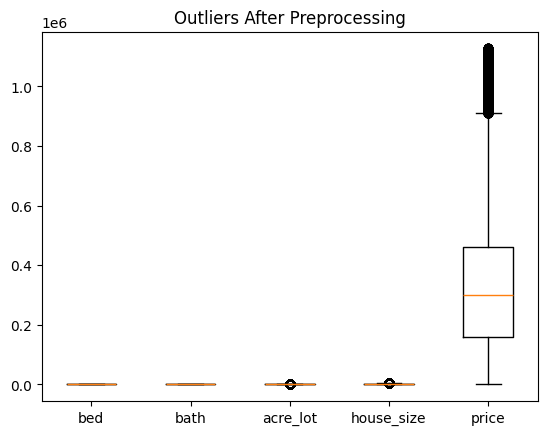

Total # of Rows without Outliers: 1583848


In [19]:
# outliers after preprocessing

column = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
plt.boxplot(df[column])
plt.xticks([1, 2, 3, 4, 5], column)
plt.title('Outliers After Preprocessing')
plt.show()
print(f'Total # of Rows without Outliers: {df.shape[0]}')

In [20]:
df.describe()

,price,bed,bath,acre_lot,street,zip_code,house_size
count,1.583848e+06,1.583848e+06,1.583848e+06,1.583848e+06,1.583848e+06,1.583848e+06,1.583848e+06
mean,3.338489e+05,3.116725e+00,2.225539e+00,2.929635e-01,9.803741e+05,5.194422e+04,1.645922e+03
std,2.318581e+05,7.242189e-01,7.194476e-01,2.735904e-01,5.678144e+05,2.830432e+04,6.046043e+02
min,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,6.010000e+02,1.000000e+02
25%,1.595000e+05,3.000000e+00,2.000000e+00,1.500000e-01,4.880830e+05,2.991000e+04,1.200000e+03
50%,2.990000e+05,3.000000e+00,2.000000e+00,1.800000e-01,9.780315e+05,4.810500e+04,1.461000e+03
75%,4.599000e+05,4.000000e+00,3.000000e+00,3.200000e-01,1.470486e+06,7.746900e+04,2.000000e+03
max,1.127350e+06,5.000000e+00,4.000000e+00,1.440000e+00,2.001357e+06,9.999900e+04,3.555000e+03


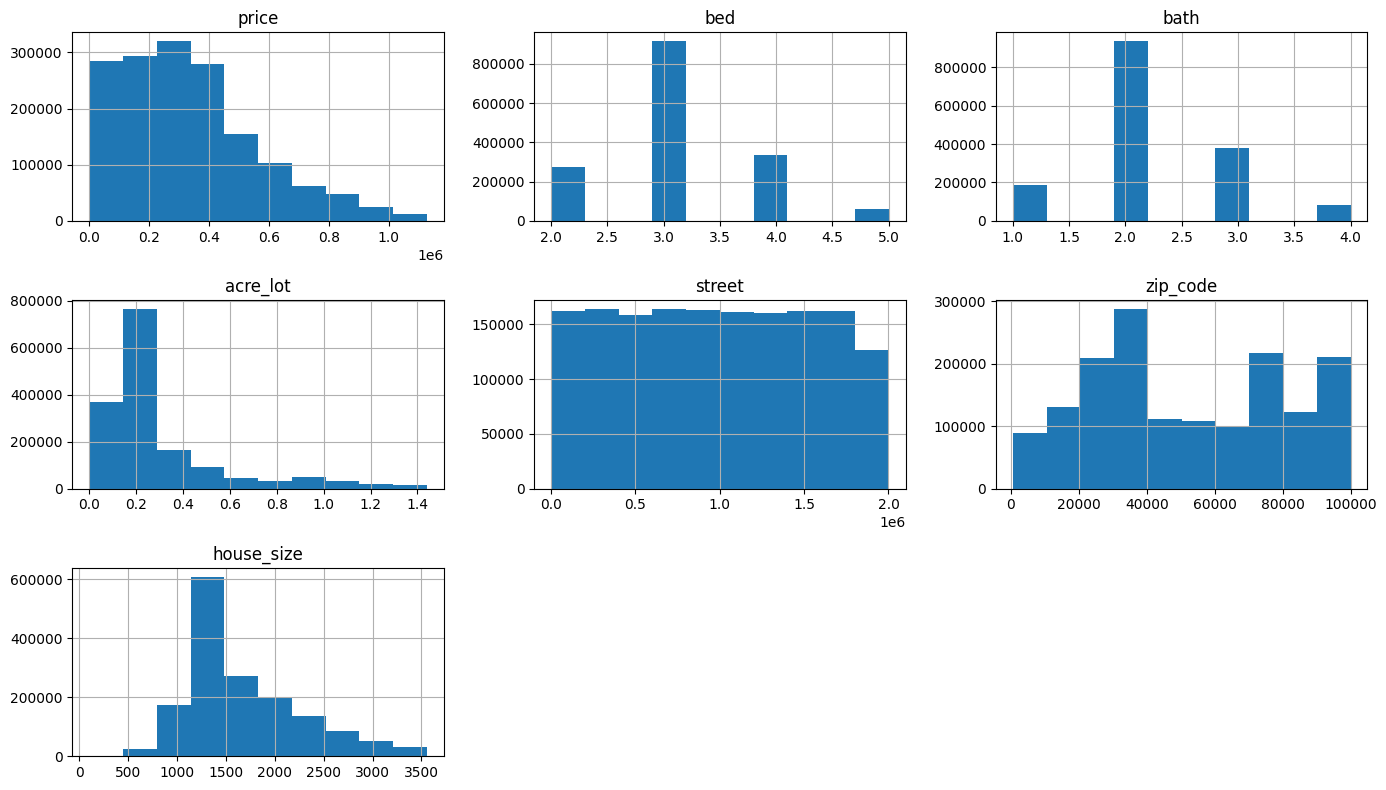

In [21]:
df.hist(bins = 10, figsize = (14, 8))
plt.tight_layout()
plt.show()

In [22]:
print(df['state'].value_counts(ascending = False))

state
Florida                 195547
Texas                   156388
California              140315
Illinois                 67736
Pennsylvania             62275
North Carolina           62262
Arizona                  57165
New York                 57066
Georgia                  55899
Ohio                     47107
Virginia                 45215
Washington               44380
New Jersey               35980
Maryland                 35572
South Carolina           32569
Missouri                 32469
Wisconsin                31598
Minnesota                31533
Michigan                 29449
Oklahoma                 27324
Tennessee                25805
Massachusetts            25670
Alabama                  24588
Oregon                   23977
Louisiana                19471
Iowa                     19445
Colorado                 19364
Kentucky                 18830
Arkansas                 14579
New Mexico               14120
Indiana                  14033
Kansas                   11361
Id

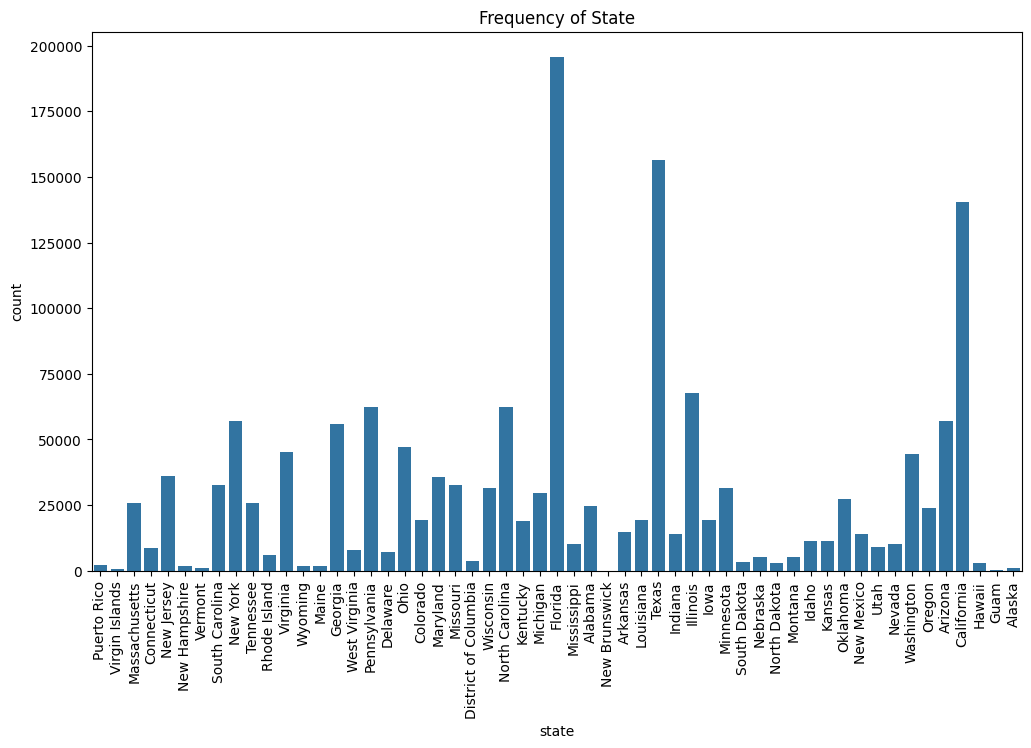

In [23]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'state', data = df)
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Frequency of State')
plt.show()

In [24]:
# basic feature engineering, such as creating a price_per_sqft feature for visualization purposes

df['price_per_sqft'] = df['price'] / df['house_size']
price_per_sqft_by_state = df.groupby('state')['price_per_sqft'].mean()
sorted_price_per_sqft_by_state = price_per_sqft_by_state.sort_values(ascending = False)
print(sorted_price_per_sqft_by_state)

state
District of Columbia    499.616219
Hawaii                  442.647644
California              390.181863
Massachusetts           324.736165
Washington              306.939704
New Jersey              293.716733
New York                284.827914
Oregon                  273.594274
Utah                    272.770971
Nevada                  269.300322
Rhode Island            263.640129
Colorado                262.271647
Idaho                   253.469602
Guam                    247.687061
Arizona                 228.140125
New Hampshire           217.409809
Connecticut             214.273328
Montana                 213.432396
Virginia                207.544398
Maryland                206.629413
Florida                 199.735011
Delaware                193.078123
South Carolina          187.504473
Virgin Islands          182.727782
Vermont                 178.017108
Georgia                 170.828904
Maine                   170.260307
Illinois                167.885215
Texas         

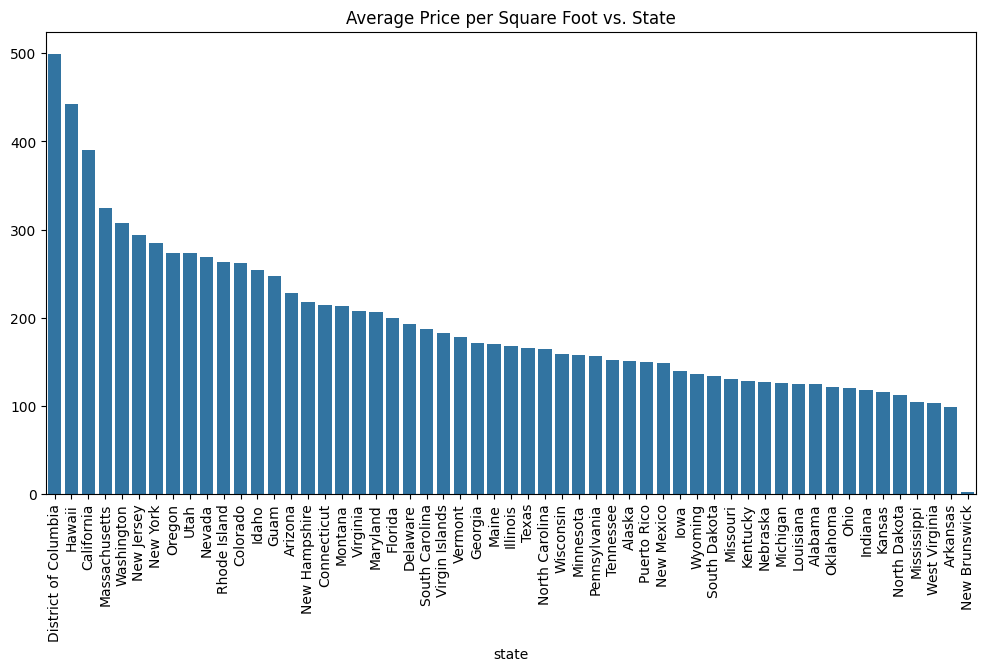

In [25]:
avg_price_per_sqft_by_state = df.groupby('state')['price_per_sqft'].mean().sort_values(ascending = False)

plt.figure(figsize = (12, 6))
sns.barplot(x = avg_price_per_sqft_by_state.index, y = avg_price_per_sqft_by_state.values)
plt.xticks(rotation = 90)
plt.title('Average Price per Square Foot vs. State')
plt.show()

In [26]:
df.groupby('state', as_index = False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending = False)

,state,house_size
24,Minnesota,1917.313259
47,Utah,1887.990508
46,Texas,1873.282950
7,Delaware,1861.185341
13,Idaho,1855.597628
5,Colorado,1854.830200
50,Virginia,1779.387150
17,Kansas,1768.076930
10,Georgia,1760.314299
21,Maryland,1749.158355


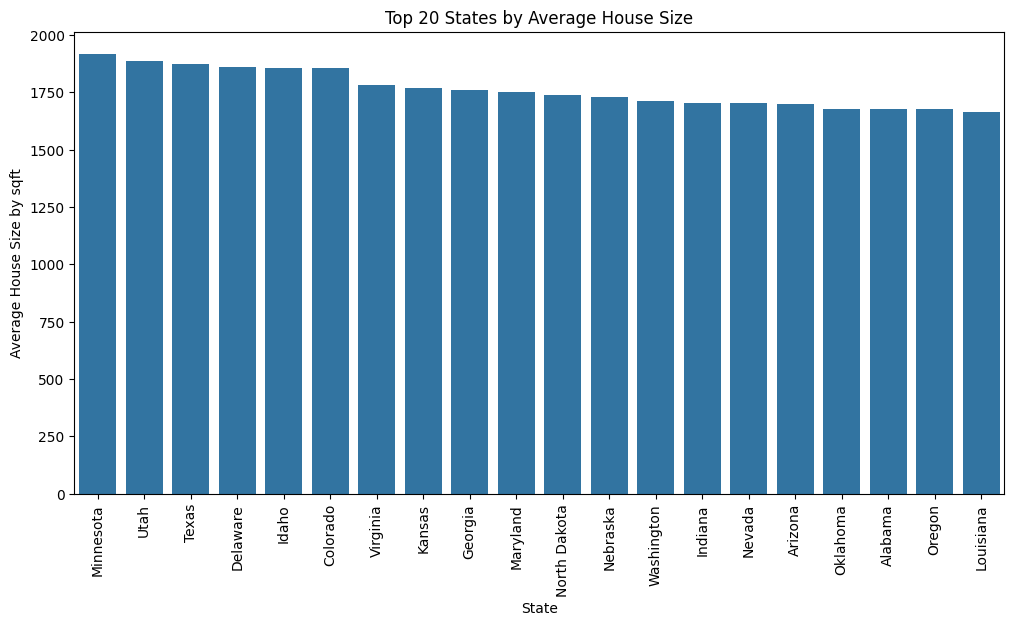

In [27]:
average_house_size = df.groupby('state', as_index = False).agg({'house_size': 'mean'})
sorted_average_house_size = average_house_size.sort_values('house_size', ascending = False)
top_20_states_by_house_size = sorted_average_house_size.head(20)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'state', y = 'house_size', data = top_20_states_by_house_size)
plt.xticks(rotation = 90)
plt.title('Top 20 States by Average House Size')
plt.xlabel('State')
plt.ylabel('Average House Size by sqft')
plt.show()

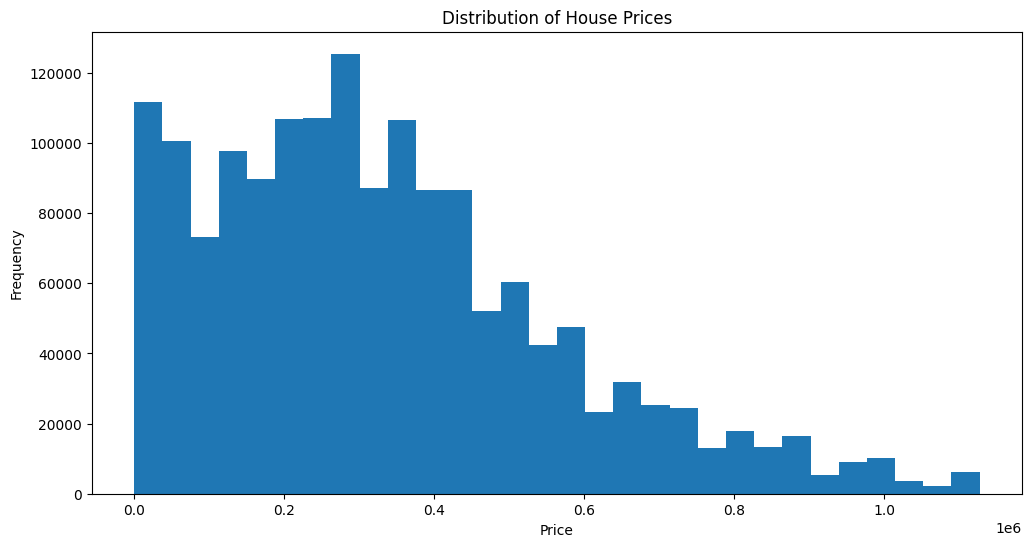

In [28]:
plt.figure(figsize = (12, 6))
plt.hist(df['price'], bins = 30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

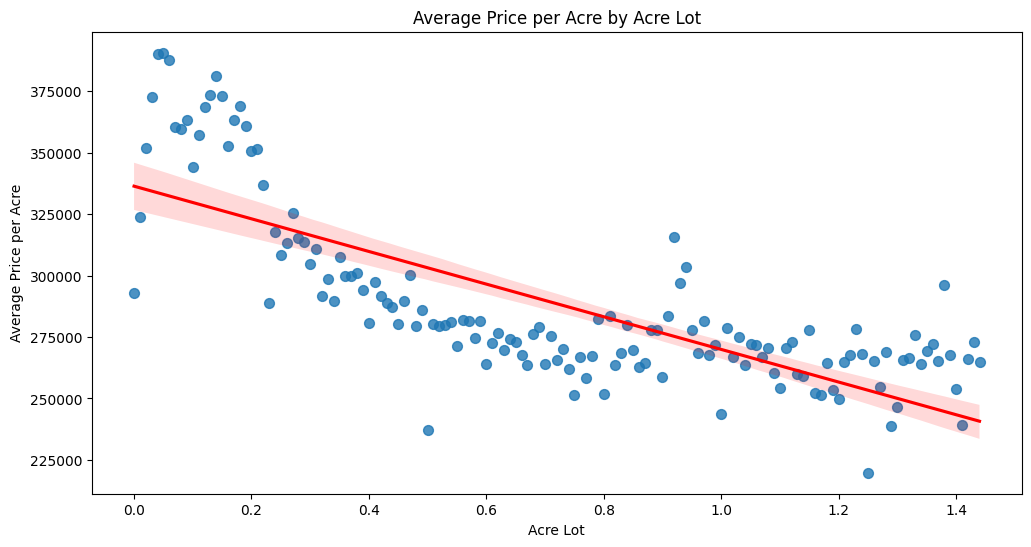

In [29]:
average_price_per_acre_lot = df.groupby('acre_lot')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.regplot(x = 'acre_lot', y = 'price', data = average_price_per_acre_lot, scatter_kws = {"s": 50}, line_kws = {"color": "red"})
plt.title('Average Price per Acre by Acre Lot')
plt.xlabel('Acre Lot')
plt.ylabel('Average Price per Acre')
plt.show()

In [30]:
df.groupby('state').agg({'price' : 'mean'}).sort_values('price', ascending = False)

,price
state,
District of Columbia,635902.850091
California,575019.682229
Washington,505581.181771
Massachusetts,494132.292598
Utah,475563.388023
Hawaii,469694.582534
Idaho,465107.408256
Colorado,462630.169593
Oregon,455681.117571


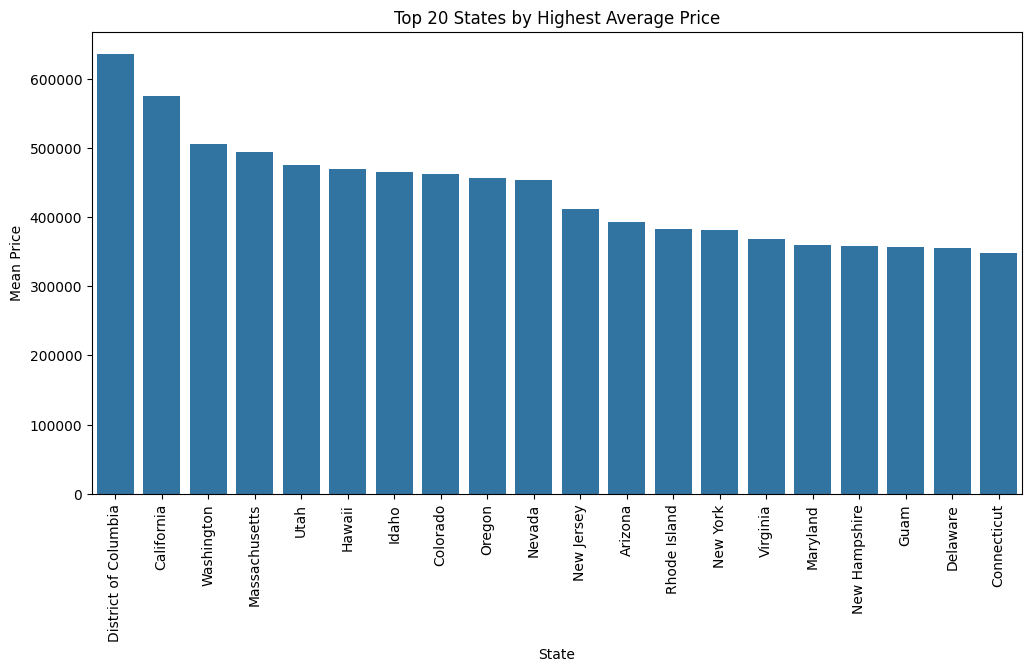

In [31]:
average_price_state = df.groupby('state', as_index = False).agg({'price': 'mean'})
sorted_average_price_state = average_price_state.sort_values('price', ascending = False)
top_20_states_by_price = sorted_average_price_state.head(20)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'state', y = 'price', data = top_20_states_by_price)
plt.xticks(rotation = 90)
plt.title('Top 20 States by Highest Average Price')
plt.xlabel('State')
plt.ylabel('Mean Price')
plt.show()

In [32]:
df.groupby('city', as_index = False).agg({'price' : 'mean'}).sort_values('price', ascending = False)

,city,price
7191,Isle Of Palms,1119000.0
3629,Davis Creek,1100000.0
12475,Redstone,1100000.0
3851,Diablo,1100000.0
1196,Bible Grove,1100000.0
...,...,...
4512,Elk Saint,1100.0
5606,Gilead,1000.0
11670,Phillips 643 Rd,985.0
6022,Greenwood Township,850.0


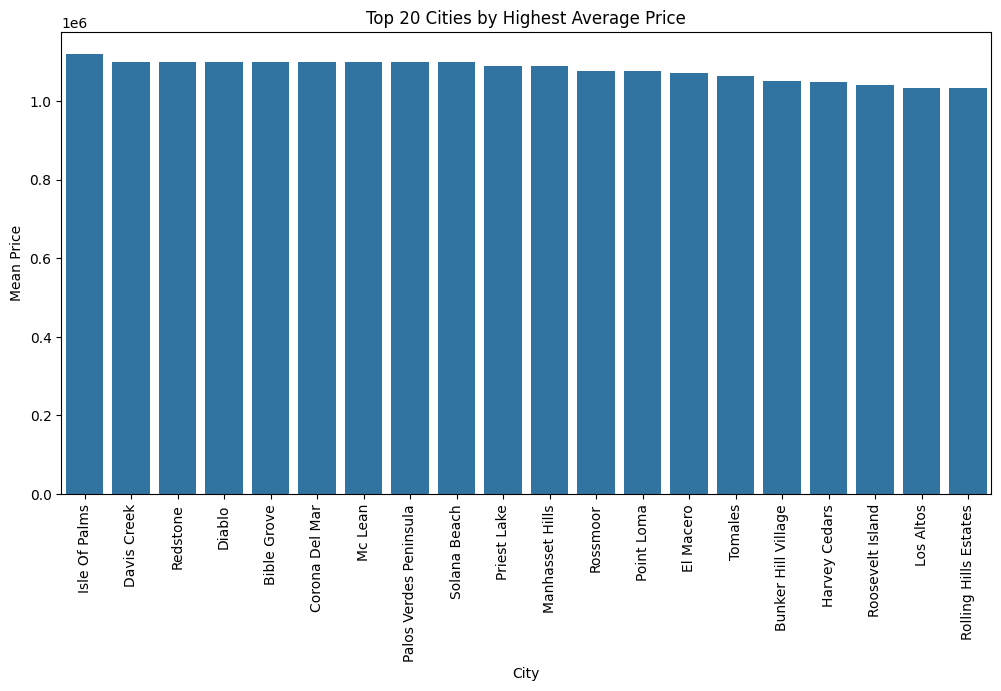

In [33]:
average_price_city = df.groupby('city', as_index = False).agg({'price': 'mean'})
sorted_average_price_city = average_price_city.sort_values('price', ascending = False)
top_20_cities_by_price = sorted_average_price_city.head(20)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'city', y = 'price', data = top_20_cities_by_price)
plt.xticks(rotation = 90)
plt.title('Top 20 Cities by Highest Average Price')
plt.xlabel('City')
plt.ylabel('Mean Price')
plt.show()

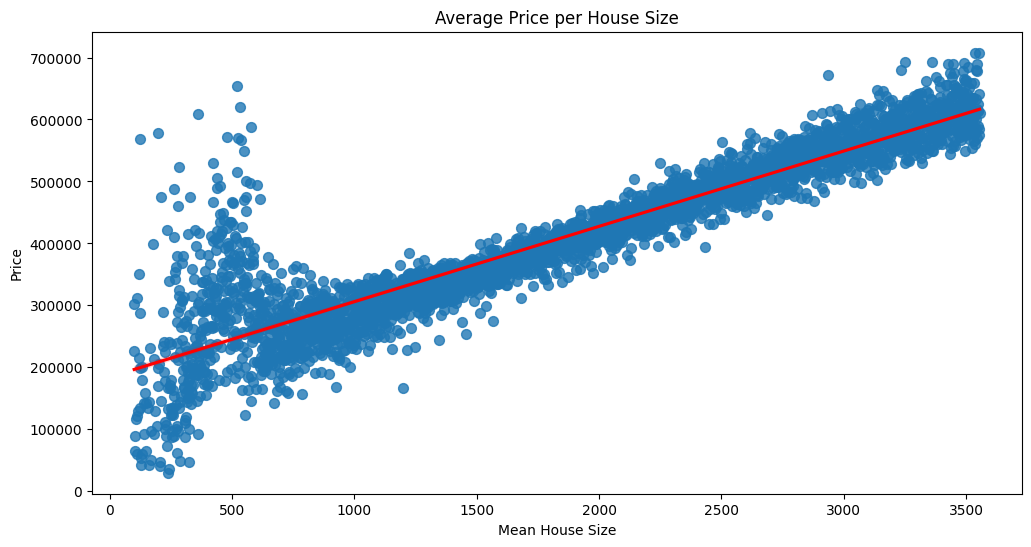

In [34]:
average_price_per_house_size = df.groupby('house_size')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.regplot(x = 'house_size', y = 'price', data = average_price_per_house_size, scatter_kws = {"s": 50}, line_kws = {"color": "red"})
plt.title('Average Price per House Size')
plt.xlabel('Mean House Size')
plt.ylabel('Price')
plt.show()

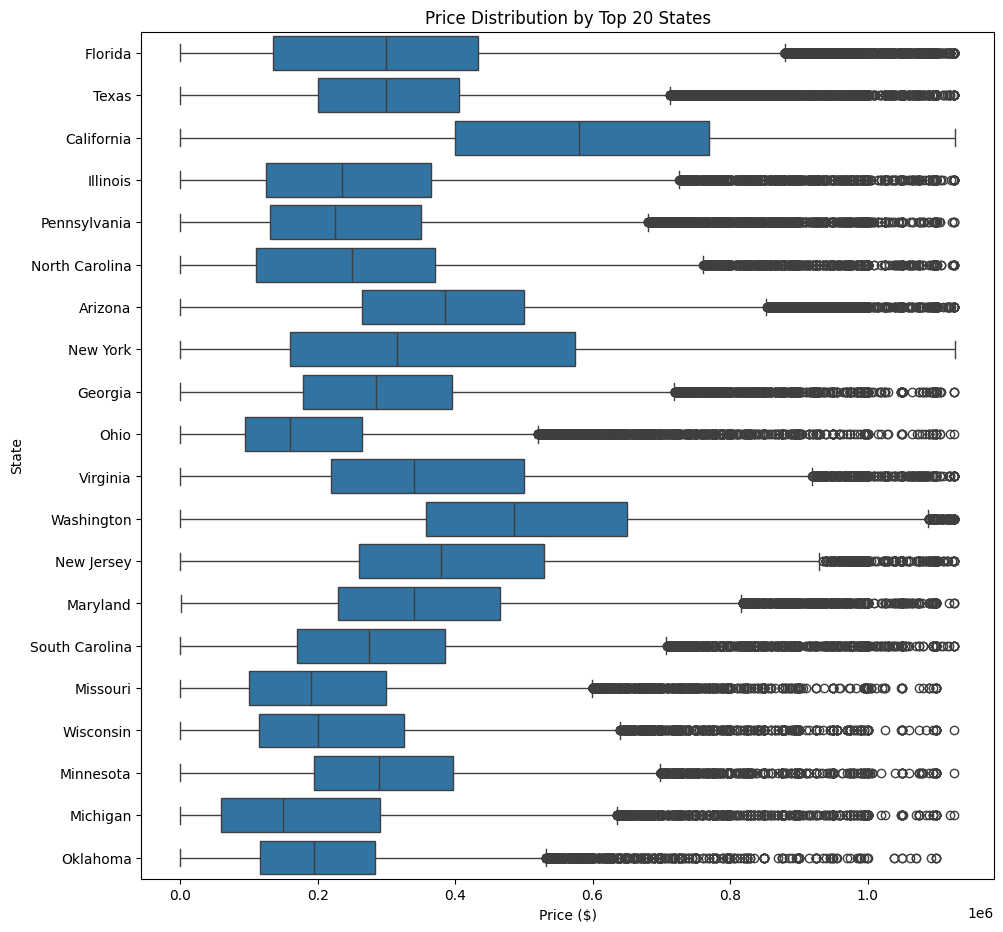

In [35]:
state_counts = df['state'].value_counts().head(20)
top_states_df = df[df['state'].isin(state_counts.index)]

plt.figure(figsize = (11, 11))
sns.boxplot(y = 'state', x = 'price', data = top_states_df, orient = 'h', order = state_counts.index)
plt.title('Price Distribution by Top 20 States')
plt.xlabel('Price ($)')
plt.ylabel('State')
plt.show()

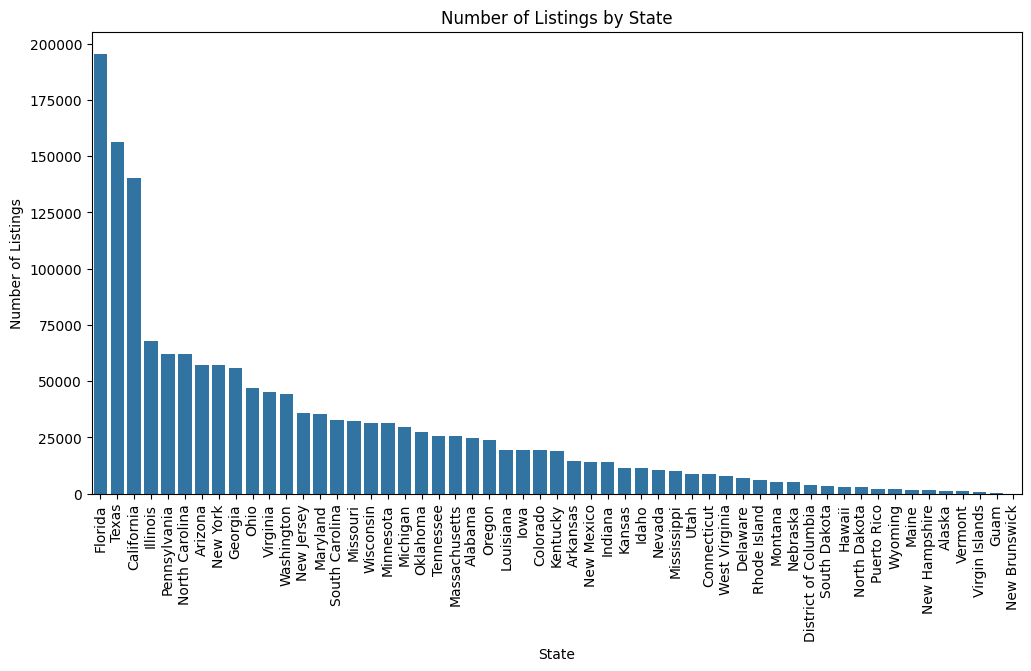

In [36]:
state_counts = df.groupby('state').size().reset_index(name = 'counts')
state_counts_sorted = state_counts.sort_values(by = 'counts', ascending = False)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'state', y = 'counts', data = state_counts_sorted)
plt.xticks(rotation = 90)
plt.title('Number of Listings by State')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.show()

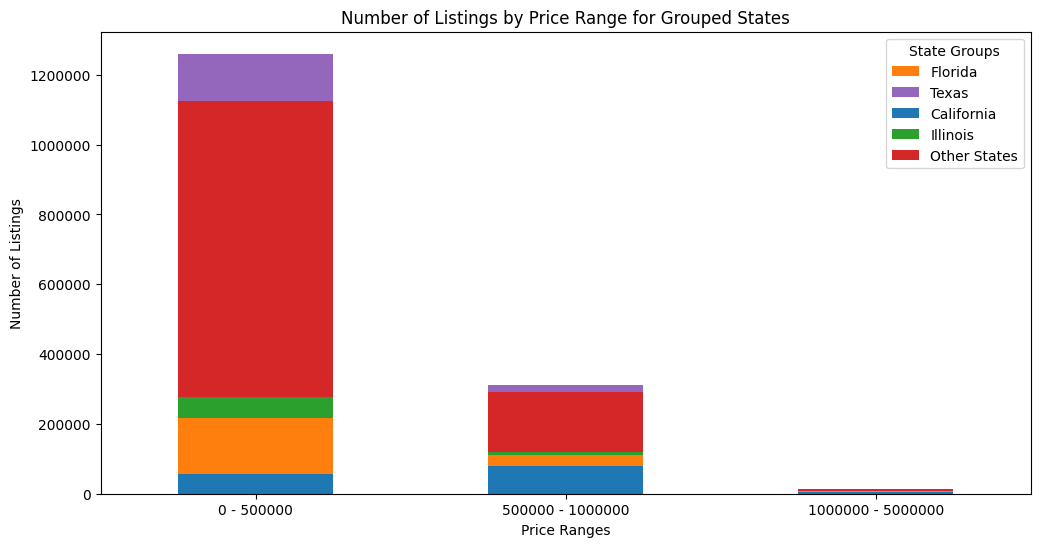

In [37]:
price_bins = [0, 500000, 1000000, 5000000, 10000000, 60000000]
price_labels = ["0 - 500000", "500000 - 1000000", "1000000 - 5000000", "5000000 - 10000000", "10000000 - 60000000"]
df['price_cat'] = pd.cut(df['price'], bins = price_bins, labels = price_labels, right = False)
top_states = ['Florida', 'Texas', 'California', 'Illinois']
df['grouped_states'] = df['state'].apply(lambda x: x if x in top_states else 'Other States')

barr = pd.crosstab(df['price_cat'], df['grouped_states'])

fig, ax = plt.subplots(figsize = (12, 6))
barr.plot(kind = 'bar', stacked = True, ax = ax)
plt.title('Number of Listings by Price Range for Grouped States')
plt.xlabel('Price Ranges')
plt.ylabel('Number of Listings')
plt.xticks(rotation = 0, ha = 'center')

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):}'))

handles, labels = ax.get_legend_handles_labels()
order = [1, 4, 0, 2, 3]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title = 'State Groups')
plt.show()

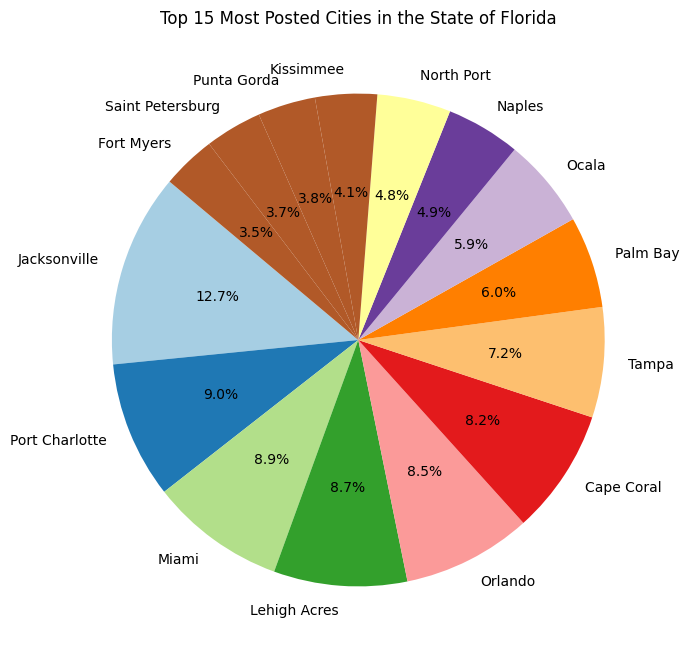

In [38]:
florida_data = df[df['state'] == 'Florida']
city_counts = florida_data['city'].value_counts().head(15)
top_cities = city_counts[:15]
plt.figure(figsize = (16, 8))
plt.pie(top_cities, labels = top_cities.index, autopct = '%1.1f%%', startangle = 140, colors = plt.cm.Paired(range(len(top_cities))))
plt.title('Top 15 Most Posted Cities in the State of Florida')
plt.show()

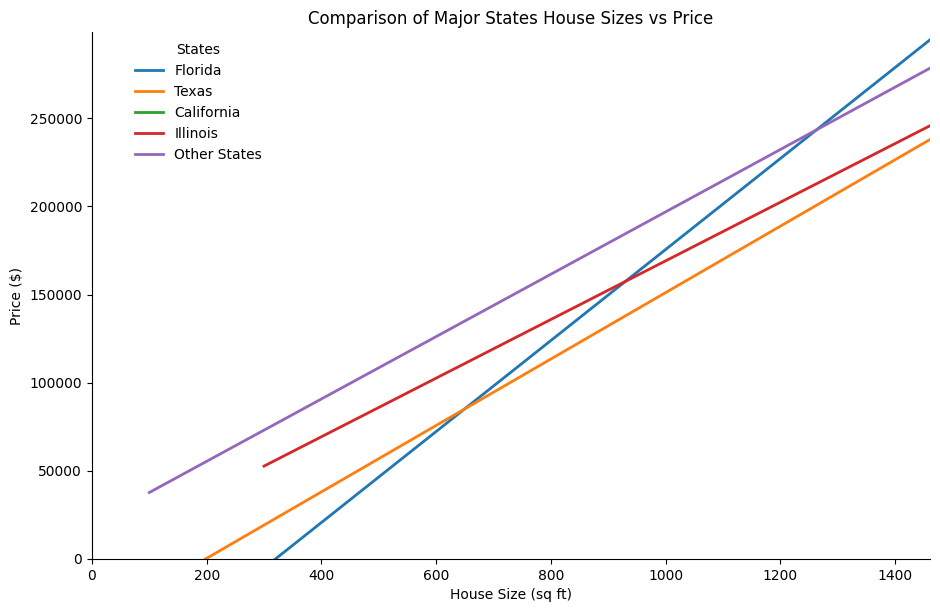

In [39]:
house_size_limit = df['house_size'].median() * 1
price_limit = df['price'].median() * 1
legend_order = ['Florida', 'Texas', 'California', 'Illinois', 'Other States']
g = sns.lmplot(x = "house_size", y = "price", hue = "grouped_states", data = df, height = 6, aspect = 1.6, hue_order = legend_order, scatter_kws = {'alpha':0.5}, line_kws = {'linewidth':2}, scatter = False, ci = None)
plt.xlim(0, house_size_limit)
plt.ylim(0, price_limit)
g._legend.set_title("States")
g._legend.set_bbox_to_anchor((0.25, 0.85))
plt.title('Comparison of Major States House Sizes vs Price')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.show()

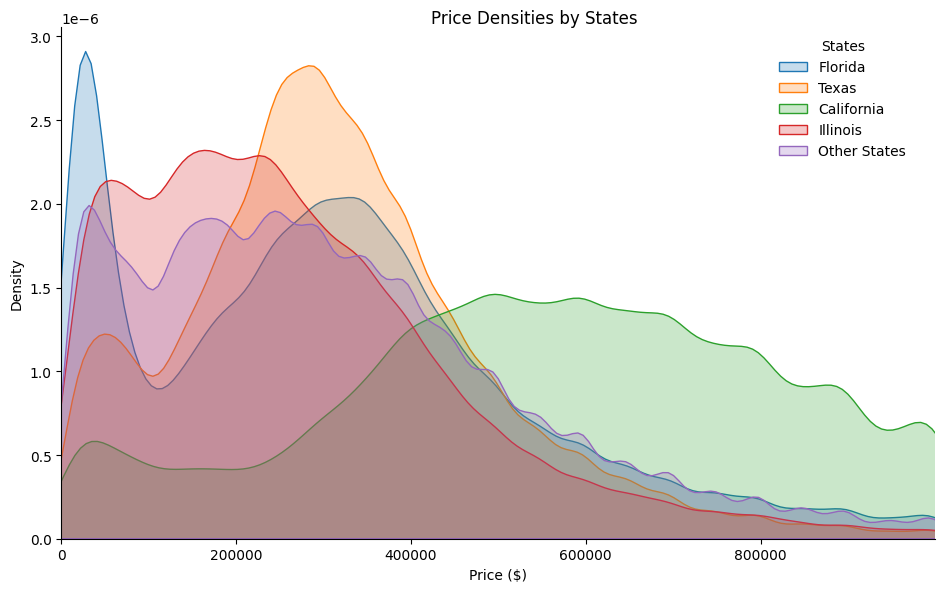

In [40]:
legend_order = ['Florida', 'Texas', 'California', 'Illinois', 'Other States']
g = sns.FacetGrid(df, hue = "grouped_states", height = 6, aspect = 1.6, hue_order = legend_order)
g.map(sns.kdeplot, "price", fill = True)
g.set(xlim = (0, df['price'].quantile(0.99)))
g.add_legend(title = "States", loc = 'upper right', bbox_to_anchor = (0.85, 0.95))
g.set_axis_labels("Price ($)", "Density")
g.fig.suptitle('Price Densities by States', fontsize = 12)
plt.show()

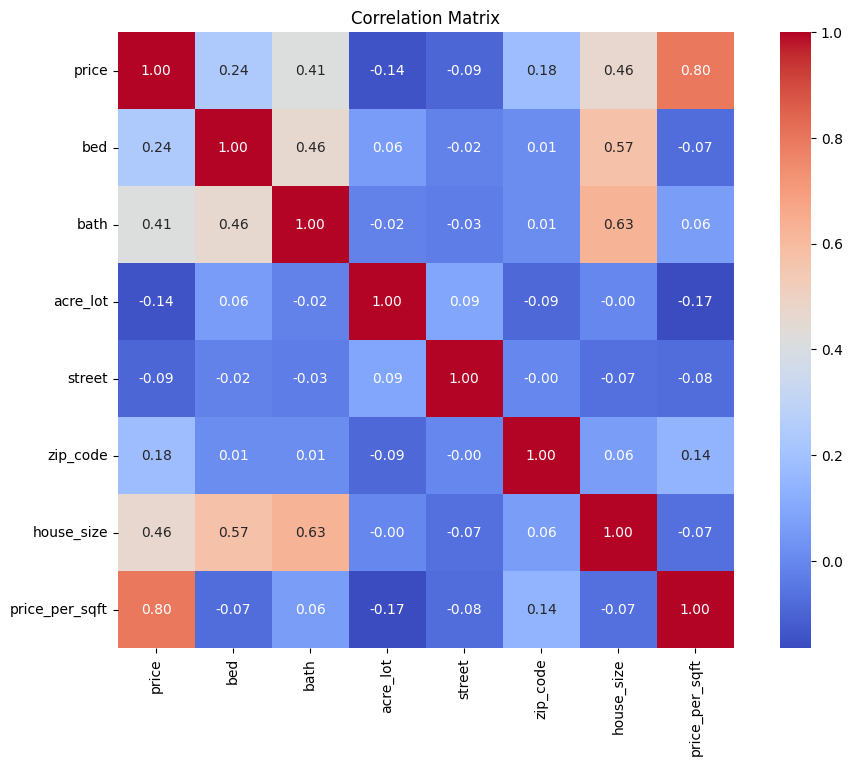

In [41]:
numeric_cols = df.select_dtypes(include = [np.number])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', cbar = True, square = True)
plt.title('Correlation Matrix')
plt.show()

In [42]:
import statsmodels.api as sm

sdf = df.copy()
sdf.dropna(inplace = True)
sdf = sdf.select_dtypes("float64")
X = sdf.drop(columns = "price")
y = sdf.price
sms = sm.OLS(y, X)
model = sms.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          4.724e+06
Date:                Mon, 10 Jun 2024   Prob (F-statistic):                        0.00
Time:                        09:59:40   Log-Likelihood:                     -2.0260e+07
No. Observations:             1583848   AIC:                                  4.052e+07
Df Residuals:                 1583841   BIC:                                  4.052e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bed            -5.057e+04     98.319   -514.302      0.000   -5.08e+04   -5.04e+04
bath            1484.8447    124.055     11.969      0.000    1241.702    1727.988
acre_lot       -3.791e+04    252.818   -149.933      0.000   -3.84e+04   -3.74e+04
street            -0.0271      0.000   -234.004      0.000      -0.027      -0.027
zip_code          -0.2756      0.002   -116.190      0.000      -0.280      -0.271
house_size       189.2938      0.163   1159.799      0.000     188.974     189.614
price_per_sqft  1149.9992      0.451   2548.653      0.000    1149.115    1150.884
==============================================================================
Omnibus:                  1123273.864   Durbin-Watson:                   1.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1643495309.944
Skew:                          -1.948   Prob(JB):                         0.00
Kurtosis:                     160.761   Cond. No.                     4.17e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3 Model Building and Evaluation

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1583848 entries, 0 to 2226380
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   status          1583848 non-null  object  
 1   price           1583848 non-null  float64 
 2   bed             1583848 non-null  float64 
 3   bath            1583848 non-null  float64 
 4   acre_lot        1583848 non-null  float64 
 5   street          1583848 non-null  float64 
 6   city            1583848 non-null  object  
 7   state           1583848 non-null  object  
 8   zip_code        1583848 non-null  float64 
 9   house_size      1583848 non-null  float64 
 10  price_per_sqft  1583848 non-null  float64 
 11  price_cat       1583848 non-null  category
 12  grouped_states  1583848 non-null  object  
dtypes: category(1), float64(8), object(4)
memory usage: 158.6+ MB


In [45]:
df.head()

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,price_per_sqft,price_cat,grouped_states
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,114.130435,0 - 500000,Other States
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,52.390308,0 - 500000,Other States
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,89.572193,0 - 500000,Other States
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,80.555556,0 - 500000,Other States
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,71.031746,0 - 500000,Other States


In [46]:
# feature selection

features = ['bed', 'bath', 'acre_lot', 'house_size', 'zip_code']
target = 'price'

X = df[features]
y = df[target]

In [47]:
# splitting the data into training and testing sets to evaluate our models' performance.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression:**

In [68]:
# train the models and evaluate their performance using appropriate metrics such as RMSE

lr = LinearRegression()
lr.fit(X_train, y_train)

# predict and evaluate

y_pred_lr = lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f"Linear Regression RMSE: {rmse_lr}")

Linear Regression RMSE: 197570.33193029187


**Random Forest:**

In [69]:
# train the model

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# predict and evaluate

y_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest RMSE: {rmse_rf}")

Random Forest RMSE: 99881.67145274361


**Model Performance**

In [50]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest'], 'RMSE': [rmse_lr, rmse_rf]})
print(results)

               Model           RMSE
0  Linear Regression  197570.331930
1      Random Forest   99881.671453


In [51]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_})
print(coefficients)

      Feature    Coefficient
0         bed  -19421.483854
1        bath   68900.410489
2    acre_lot -103088.699847
3  house_size     135.824855
4    zip_code       1.167125


In [52]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importance)

      Feature  Importance
4    zip_code    0.502144
3  house_size    0.213688
1        bath    0.187942
2    acre_lot    0.077065
0         bed    0.019161


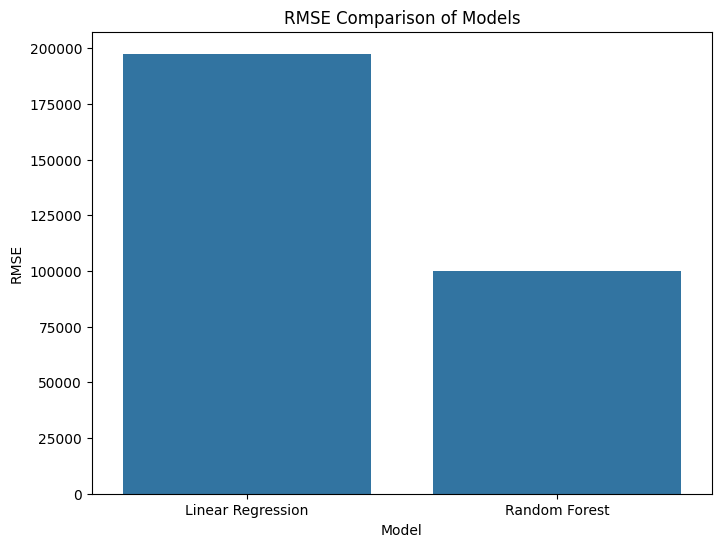

In [53]:
# visualizing RMSE Comparison

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title('RMSE Comparison of Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

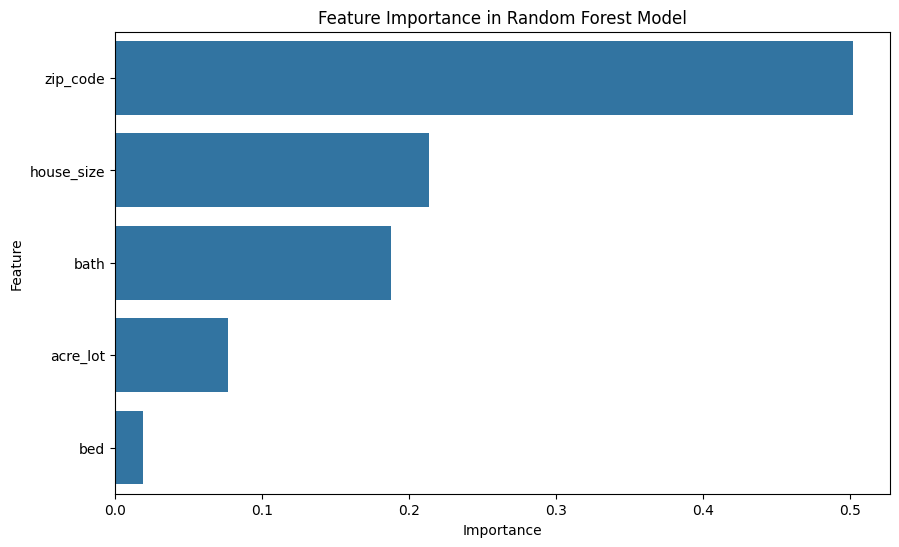

In [54]:
# visualizing Feature Importance

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 4 Prediction Testing

In [55]:
# example input data

input_data = {'bed': 3, 'bath': 2, 'acre_lot': 0.15, 'house_size': 1500, 'zip_code': 90210}

# convert the input data to a DataFrame

input_df = pd.DataFrame([input_data])

# linear Regression prediction

lr_prediction = lr.predict(input_df)
print(f"Linear Regression Prediction: ${lr_prediction[0]:,.2f}")

# random Forest prediction

rf_prediction = rf.predict(input_df)
print(f"Random Forest Prediction: ${rf_prediction[0]:,.2f}")

Linear Regression Prediction: $360,080.45
Random Forest Prediction: $799,175.73


In [56]:
# example batch input data

input_batch_data = [
    {'bed': 3, 'bath': 2, 'acre_lot': 0.15, 'house_size': 1500, 'zip_code': 90210},
    {'bed': 4, 'bath': 3, 'acre_lot': 0.20, 'house_size': 2000, 'zip_code': 94105},
    # Add more instances as needed
]

# convert the batch input data to a DataFrame

input_batch_df = pd.DataFrame(input_batch_data)

# batch predictions

lr_batch_predictions = lr.predict(input_batch_df)
rf_batch_predictions = rf.predict(input_batch_df)

# display batch predictions

print("Linear Regression Batch Predictions:")
print(lr_batch_predictions)
print("Random Forest Batch Predictions:")
print(rf_batch_predictions)

Linear Regression Batch Predictions:
[360080.45366192 476863.3261939 ]
Random Forest Batch Predictions:
[799175.73333333 742867.34      ]


In [57]:
# example input data

input_data = {
    'bed': 3,
    'bath': 2,
    'acre_lot': 0.15,
    'house_size': 1500,
    'zip_code': 90210
}

# convert the input data to a DataFrame

input_df = pd.DataFrame([input_data])

# ensure the input data is in the same format as the training data

print(input_df)

   bed  bath  acre_lot  house_size  zip_code
0    3     2      0.15        1500     90210


In [58]:
# linear Regression Coefficients

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
})

print("Linear Regression Coefficients:")
print(coefficients)

print()

# random Forest Feature Importance

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance)

Linear Regression Coefficients:
      Feature    Coefficient
0         bed  -19421.483854
1        bath   68900.410489
2    acre_lot -103088.699847
3  house_size     135.824855
4    zip_code       1.167125

Random Forest Feature Importance:
      Feature  Importance
4    zip_code    0.502144
3  house_size    0.213688
1        bath    0.187942
2    acre_lot    0.077065
0         bed    0.019161


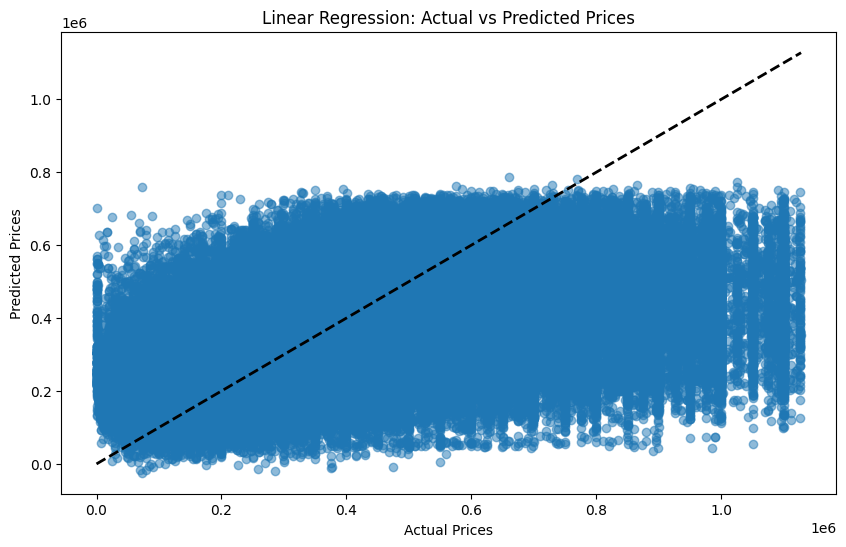

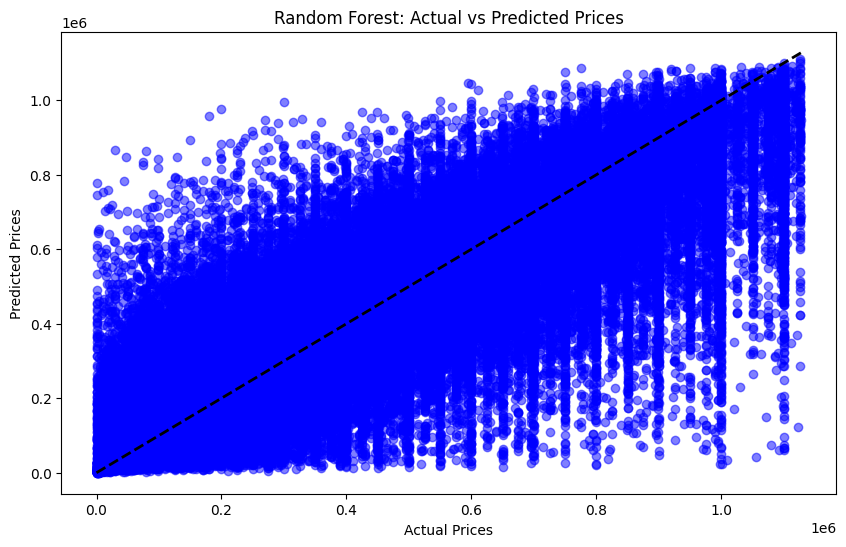

In [59]:
# predictions on test data

y_pred_lr_test = lr.predict(X_test)
y_pred_rf_test = rf.predict(X_test)

# scatter plot for Linear Regression

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr_test, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# scatter plot for Random Forest

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_test, alpha=0.5, color='b')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [60]:
# calculate discrepancies

discrepancies = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression Prediction': y_pred_lr_test,
    'Random Forest Prediction': y_pred_rf_test,
    'Difference': np.abs(y_pred_lr_test - y_pred_rf_test)
})

# sort by difference

discrepancies = discrepancies.sort_values(by='Difference', ascending=False)

# display top 10 discrepancies

print(discrepancies.head(10))

            Actual  Linear Regression Prediction  Random Forest Prediction  \
60371     899000.0                 114474.041641              1.000840e+06   
1361128  1098000.0                 179610.282513              1.050188e+06   
1471694   890000.0                  34747.038226              9.027250e+05   
115499    750000.0                 230395.486946              1.076928e+06   
71382    1075000.0                 149093.039909              9.904715e+05   
17033     849500.0                 165521.186140              1.006709e+06   
109328    835000.0                  65560.771969              9.049929e+05   
109319    895000.0                  65560.771969              9.049929e+05   
67321     920000.0                 243104.423413              1.082336e+06   
108336   1099000.0                 243104.423413              1.082336e+06   

            Difference  
60371    886365.958359  
1361128  870578.050820  
1471694  867977.961774  
115499   846532.253054  
71382    841378.

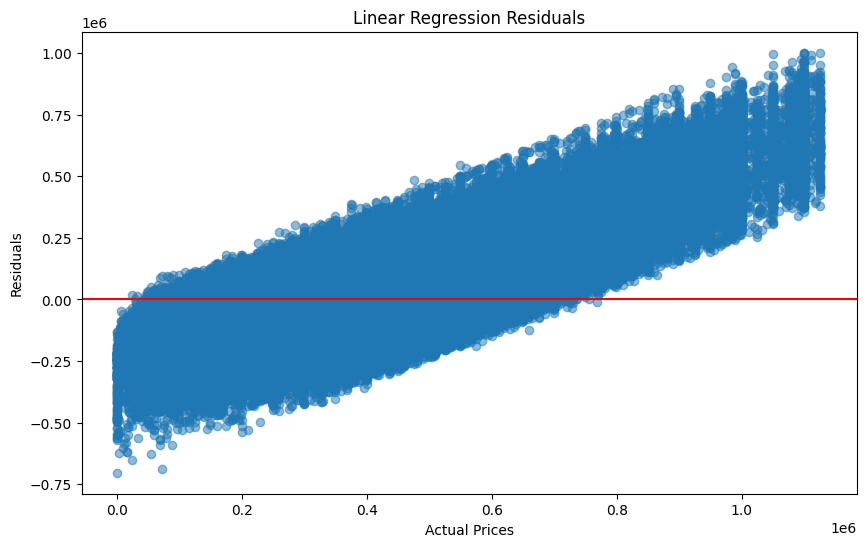

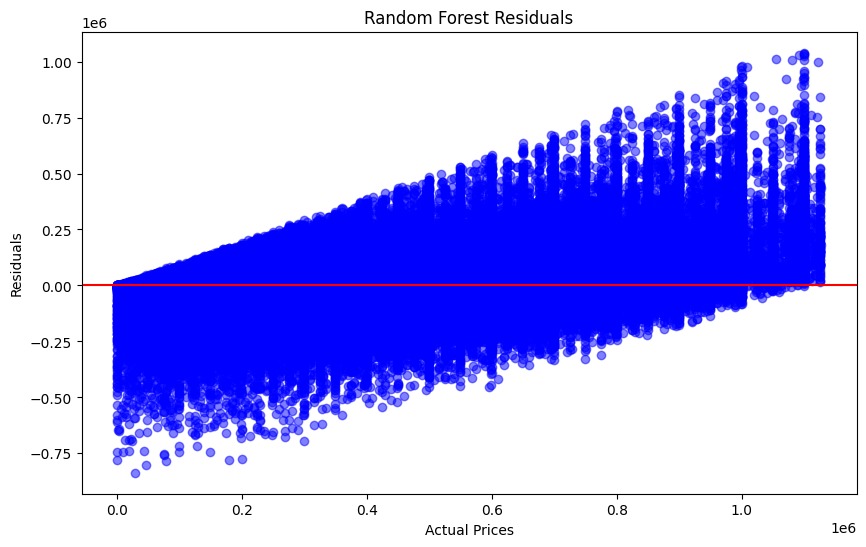

In [61]:
# residuals for Linear Regression

residuals_lr = y_test - y_pred_lr_test

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_lr, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Linear Regression Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# residuals for Random Forest

residuals_rf = y_test - y_pred_rf_test

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf, alpha=0.5, color='b')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Random Forest Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

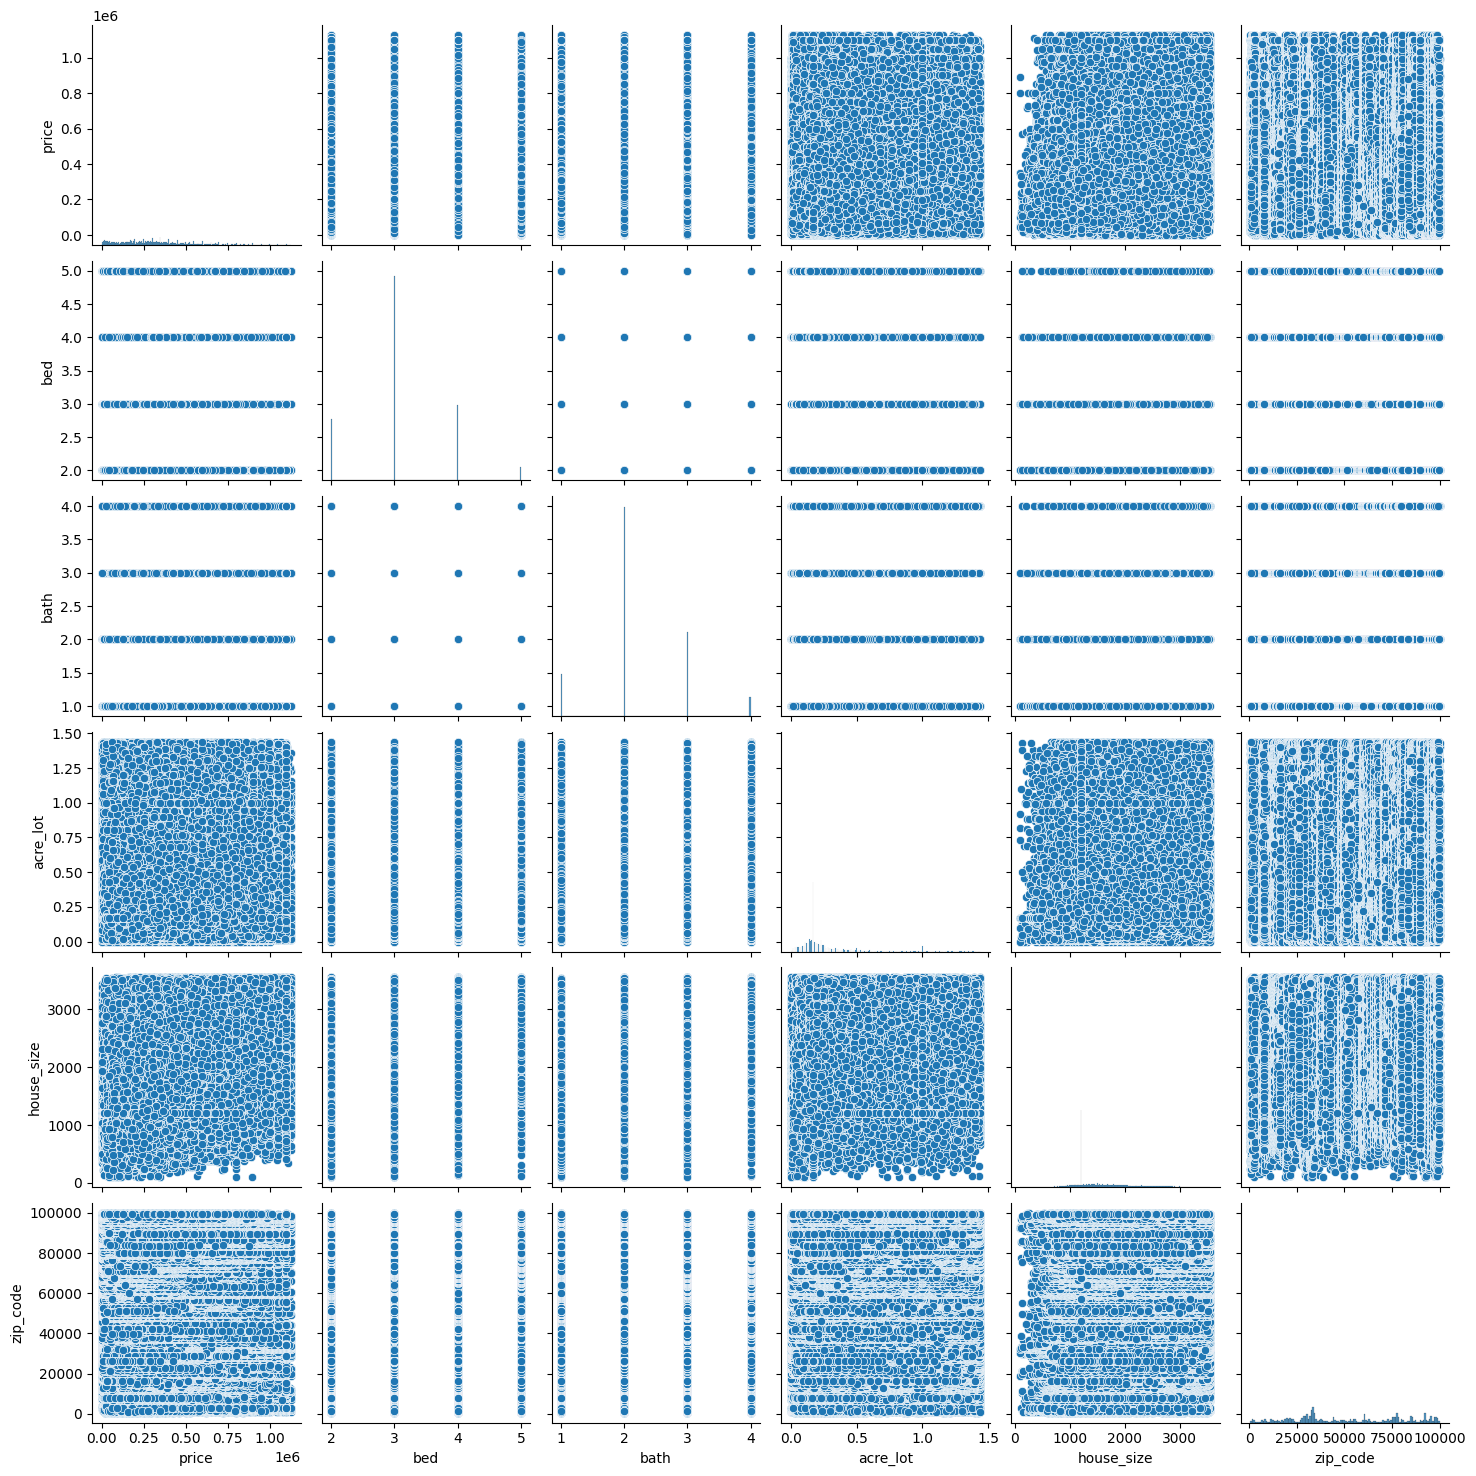

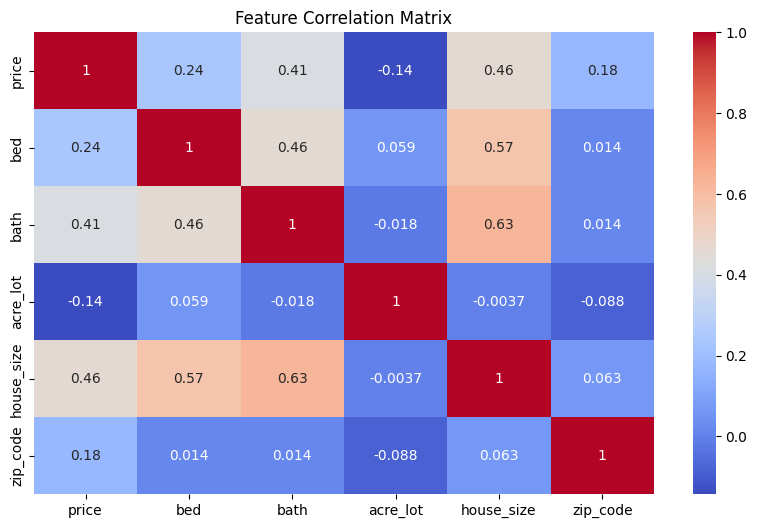

In [62]:
# pairplot to explore feature interactions

sns.pairplot(df[['price', 'bed', 'bath', 'acre_lot', 'house_size', 'zip_code']])
plt.show()

# correlation matrix to identify feature relationships

corr_matrix = df[['price', 'bed', 'bath', 'acre_lot', 'house_size', 'zip_code']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()